In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 
from scipy.interpolate import interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp

What's Going down in the middle  
Interpolation is a statistical method by which related known values are used to estimate an unknown price or potential yield of a security. Interpolation is achieved by using other established values that are located in sequence with the unknown value. Interpolation is at root a simple mathematical concept.

In [160]:
x = np.linspace(0,10,5)
y = x**2

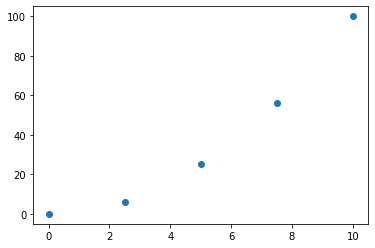

In [161]:
plt.scatter(x,y)
plt.show()

Linear Interplation  
joining each point with a stright line

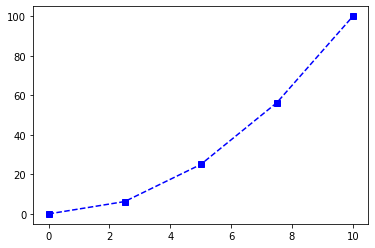

In [162]:
plt.plot(x,y,'bs--')
plt.show()

In [163]:
# the above can easy be expred as 'linear'
# y_f expresses a function in x
y_f = interp1d(x,y,'linear')
y_f(7)
# Here we can observe the square of 7 is given 50 but it is 49.Hence, a variation is created due to stright line
# we have to create a smmoth curve to tackle this difficulty.

array(50.)

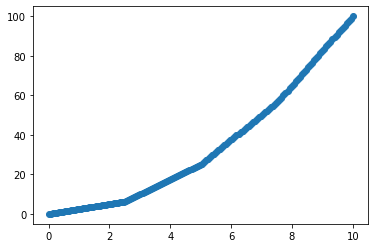

In [164]:
#lets get a curve which describe these stright lined points.
x_1 = np.linspace(0,10,150)
y_1 = y_f(x_1)
plt.scatter(x_1,y_1)
plt.show()
# Here we can see sharp edges
# lets make it smooth

Cubic Interpolation

In [165]:
x = np.linspace(0,10,5)
y = x**2

In [166]:
y_f = interp1d(x,y,'cubic')

x = np.linspace(0,5,50)
y = y_f(x)

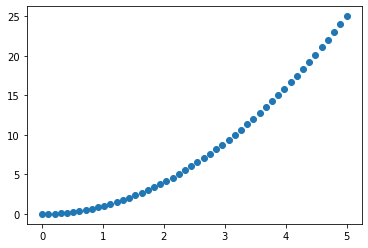

array(49.)

In [167]:
plt.scatter(x,y)
plt.show()
# A smmoth curve is obtained lets check it too
y_f(7)
# Cool!! it is on now

__Computing integral__.    Given a distribution of energies in a beam of photons, compute the mean energy.

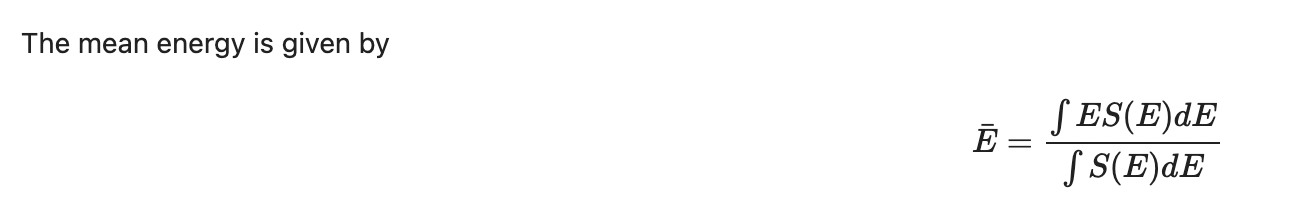

In [168]:
# Maxwell's Distribution
E = np.array([ 0.1  ,  0.2  ,  0.3  ,  0.4  ,  0.5  ,  0.55 ,  0.662,  0.8  ,
        1.   ,  1.25 ,  1.5  ,  2.   ,  3.   ,  4.   ,  5.   ,  6.   ,
        8.   , 10.   ])

S = np.array([0.   , 0.032, 0.06 , 0.086, 0.109, 0.131, 0.151, 0.185, 0.212,
       0.238, 0.257, 0.274, 0.256, 0.205, 0.147, 0.096, 0.029, 0.002])

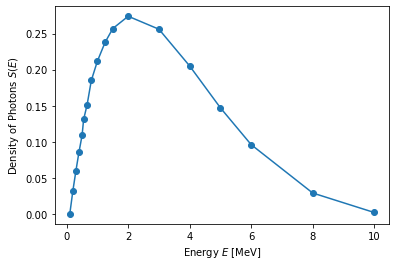

In [169]:
plt.scatter(E, S)
plt.xlabel('Energy $E$ [MeV]')
plt.ylabel('Density of Photons $S(E)$')
plt.plot(E,S)

The mean energy is given by the integration method.  
**Lets create a S_f function which will relation between Energy and Density**


In [170]:
S_f = interp1d(E,S, 'cubic')

In [171]:
numerator = quad(lambda E: E*S_f(E), min(E_data), max(E_data))[0]
denominator = quad(lambda E: S_f(E), min(E_data), max(E_data))[0]
E_mean = numerator/denominator

In [172]:
E_mean

3.3825472782623387

__**Solving the Rocket Equation**__

In [175]:
# Time and Mass of the Rocket
t_data = np.array([0.  , 0.25, 0.5 , 0.75, 1.  ])
m_data = np.array([1.        , 0.99912109, 0.971875  , 0.78642578, 0.1       ])

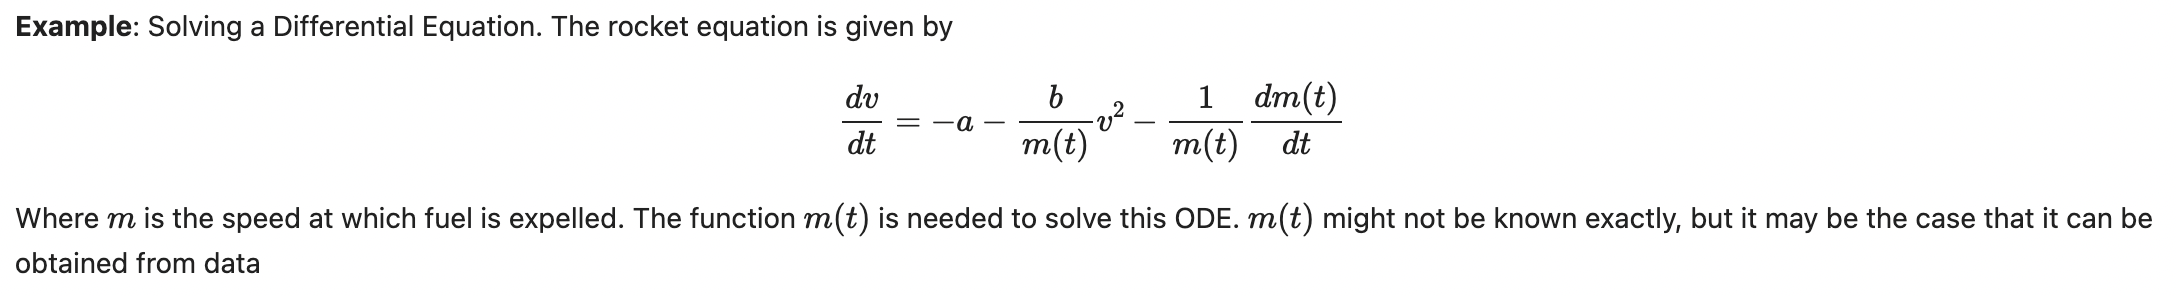

In [176]:
m_f = interp1d(t_data, m_data, 'cubic')
dmdt_f = m_f._spline.derivative(nu=1)
t = np.linspace(min(t_data),max(t_data),100)
m = m_f(t)
dmdt = dmdt_f(t)

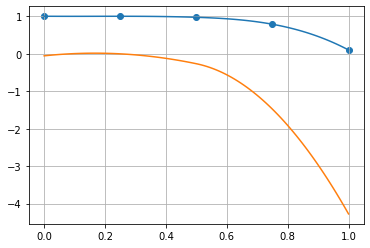

In [179]:
plt.scatter(t_data, m_data)
plt.plot(t, m)

plt.plot(t, dmdt)
plt.grid()

In [180]:
a = 0.78
b = 0.1

def dvdt(t,v):
    return -a-b/m_f(t)-dmdt_f(t)/m_f(t)

sol = solve_ivp(dvdt, [1e-4, 1], y0=[0], t_eval=np.linspace(1e-4,1,1000))

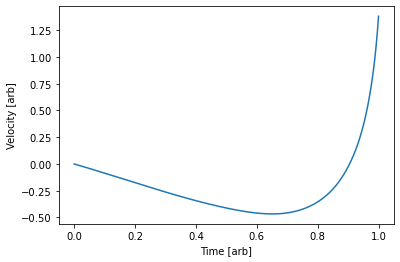

In [181]:
plt.plot(sol.t, sol.y[0])
plt.ylabel('Velocity [arb]')
plt.xlabel('Time [arb]')
plt.show()

__2D interpolation__

In [182]:
x = np.array([0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  ,
       0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25,
       0.5 , 0.75, 1.  ])
y = np.array([0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.75, 0.75, 0.75, 0.75, 0.75, 1.  , 1.  ,
       1.  , 1.  , 1.  ])
z = np.array([0.    , 0.0625, 0.25  , 0.5625, 1.    , 0.0625, 0.125 , 0.3125,
       0.625 , 1.0625, 0.25  , 0.3125, 0.5   , 0.8125, 1.25  , 0.5625,
       0.625 , 0.8125, 1.125 , 1.5625, 1.    , 1.0625, 1.25  , 1.5625,
       2.    ])

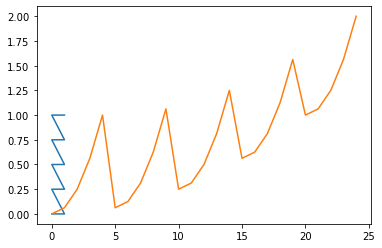

In [185]:
plt.plot(x,y,z)

In [187]:
z_f = interp2d(x,y,z,'cubic')
z_f(0.2,0.45456456)
# Puting x,y and getting corresponding z

array([0.24662894])